## Data cleaning

Data cleaning is something data scientists spend a lot of time on. The problem with teaching data cleaning is that the problems you will face are incredibly diverse. In this Notebook you will just see a few issues. Excellent (much better, to be honest) overviews can be found [here](https://realpython.com/python-data-cleaning-numpy-pandas/) or [here](https://www.tutorialspoint.com/python/python_data_cleansing.htm). This Notebook will contain most information you will need for the first Assignment, however.

Let's start with a common situation you might face: you have data that are distributed among two files. I'm using a selection from a data set on [Google Play apps](https://www.kaggle.com/lava18/google-play-store-apps/home). 

In [2]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np


df1 = pd.read_csv('steps_data.csv', delimiter = ';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv('survey_data.csv')
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


# Add mean stepcount to dateframe

In [4]:
df['mean_steps'] = 0  # made a new collum #Change into nan if possible 
for r in range(929):
    mean = np.array(list(df1.iloc[r, 10:]))
    mean = np.nanmean(mean)
    if (str(mean) != 'nan'):
        df.iloc[r,10]=mean # added the mean_steps of every person to the collum 
df 

/Users/jessereessink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3455.074074
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4986.550505
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6376.038168
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5516.014493
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Bordeaux,male,25-34,5,family,high school,177.0,69.0,88.0,9903.045455
925,926,Bordeaux,male,35-44,1,single,bachelor,172.0,66.0,81.0,5242.325000
926,927,Lyon,female,45-54,3,family,primary,169.0,108.0,108.0,8816.908714
927,928,Montpellier,female,35-44,1,single,master or doctorate,167.0,64.0,85.0,5431.582160


In [5]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 11 columns):
id            929 non-null int64
city          929 non-null object
gender        929 non-null object
age           929 non-null object
hh_size       929 non-null int64
hh_type       929 non-null object
education     928 non-null object
height        925 non-null float64
weight        927 non-null float64
waist         928 non-null float64
mean_steps    929 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 80.0+ KB


In [6]:
df['waist'].value_counts() #Get all the values. This may be less useful when there are many values.

90.0     46
80.0     46
84.0     35
83.0     32
82.0     30
         ..
131.0     1
36.0      1
39.0      1
35.0      1
147.0     1
Name: waist, Length: 85, dtype: int64

There are three values that are problematic: the "/" we already discovered, and two ratings that are above 5.0. Let's create a new column that excludes them.

In [7]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_111(x):
    if(x > 111.0): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(above_111)


In [8]:
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def below_50(x):
    if(x < 50): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(below_50)


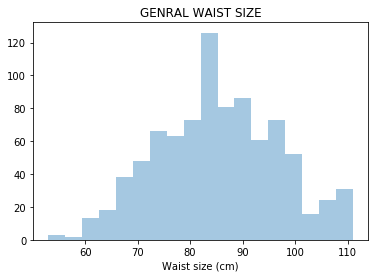

In [9]:
sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('GENRAL WAIST SIZE')
plt.xlabel('Waist size (cm)')
plt.show()

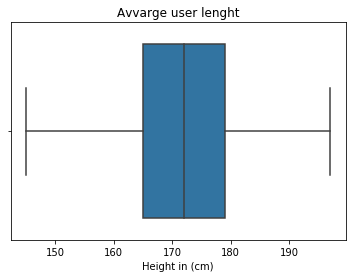

In [10]:
sns.boxplot(df['height']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Avvarge user lenght')
plt.xlabel('Height in (cm)')
plt.show()

/Users/jessereessink/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jessereessink/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


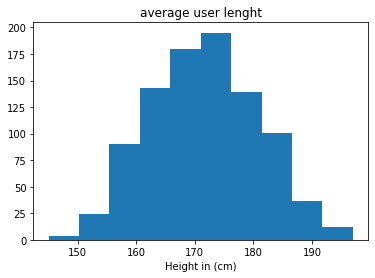

In [11]:
plt.hist(df['height']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('average user lenght')
plt.xlabel('Height in (cm)')
plt.show()

#boxplot shows 25% of the users left of the blue box, because one user is just 145cm it go's allot to the left
#So this might not give the right respresentation of the total height of user. 
# in the blue box it represents 50% of the height and right of the blue blox are the top 25 % of height.
# you can see that the average hight is about 172cm. 



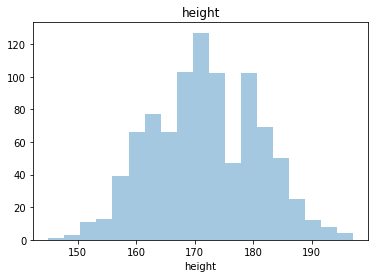

In [12]:
df["height"].name = 'height' #Labeling the variable for plotting
height_av = df["height"].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(height_av, kde=False)
plt.title('height')
plt.show()

The median of height is: 172.0 cm
The mean of height is: 171.7545945945946 cm


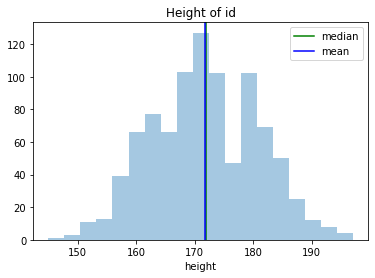

In [13]:
mean_size = df["height"].mean()
median_size = df["height"].median()
print(f'The median of height is: {median_size} cm')
print(f'The mean of height is: {mean_size} cm')
sns.distplot(height_av, kde=False)
plt.title('Height of id')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100
plt.axvline(mean_size, 0, 100, color='blue', label='mean')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

In [14]:
# in the histogram you can see a strange gab between 170cm and arround 180cm. I think this is because of the diffrence
#between man and women 
# the median and mean are almust simulair, this was to expect becuase the diffrences between the hights hight and the 
#lowest hight don't differ all that mutch, for exmaple a sallary can be 20.000$ a year or 1.000.000$ than you would have
# way more difference between the values. 

# Assesment 2

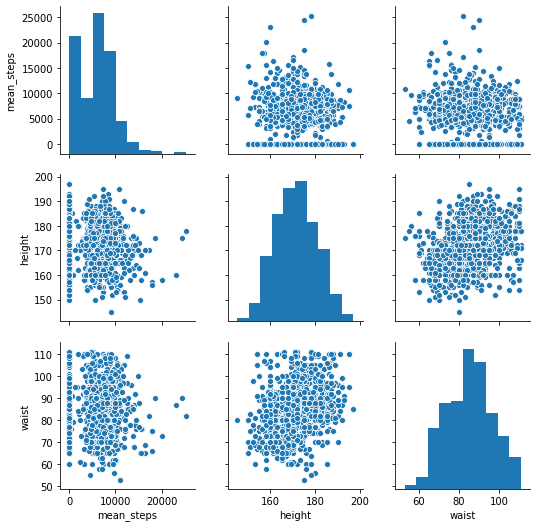

In [15]:
df_sel = df[['mean_steps','height','waist']] #making a new dataframe with a subset
sns.pairplot(df_sel.dropna())
plt.show()

In [16]:
df_sel['mean_steps'].value_counts()

0.000000        220
6299.500000       1
8634.930000       1
7430.431373       1
1773.947368       1
               ... 
4048.948357       1
13017.016779      1
8165.949153       1
5066.401460       1
7070.675325       1
Name: mean_steps, Length: 710, dtype: int64

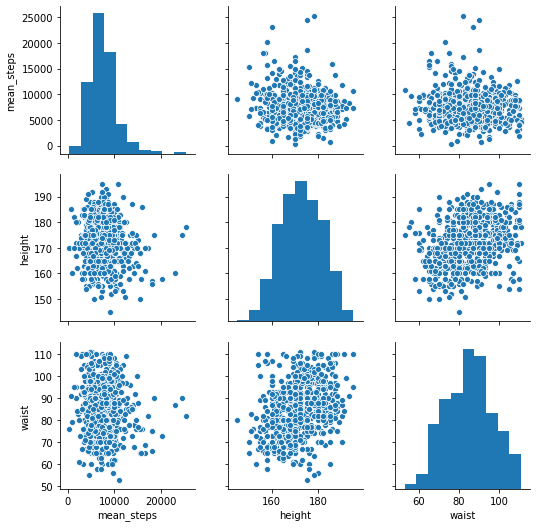

In [17]:
df = df[(df['mean_steps'] > 100)& (df['height'] > 10) & (df['waist'] > 0)] #remove wrong data
df_sel = df[['mean_steps','height','waist']]
sns.pairplot(df_sel.dropna())
plt.show()

# Correlation matrix including all 3 variables

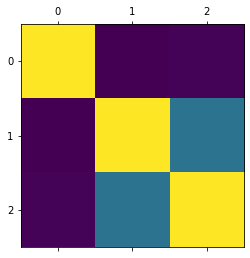

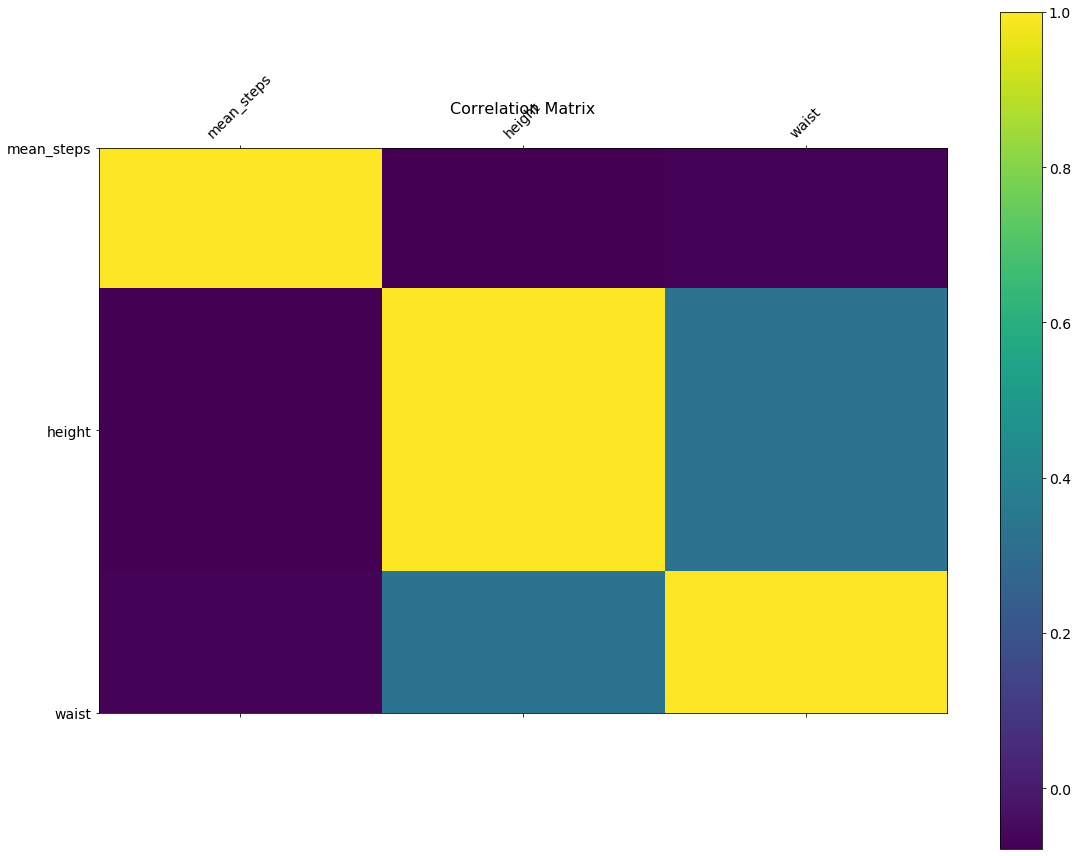

In [18]:
plt.matshow(df_sel.corr())# make a correlation matrix with meansteps, height and waist
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df_sel.corr(), fignum=f.number)
plt.xticks(range(df_sel.shape[1]), df_sel.columns, fontsize=14, rotation=45)
plt.yticks(range(df_sel.shape[1]), df_sel.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Scatter plots of your variable with the 2 other variables (2 scatter plots in total

Text(0.5, 1.0, 'scatterplot meansteps and height')

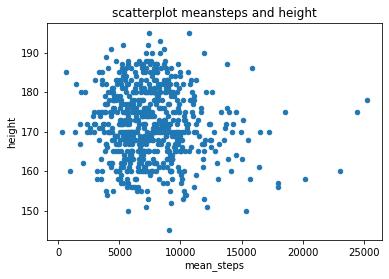

In [51]:
df_sel.plot.scatter(x="mean_steps",y="height") #scatter plot meansteps/height
plt.title('scatterplot meansteps and height')

Text(0.5, 1.0, 'scatterplot meansteps and waist')

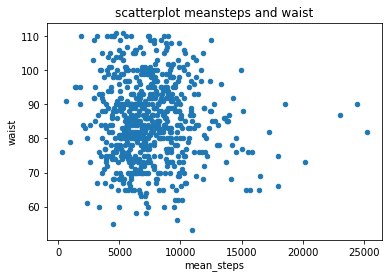

In [50]:
df_sel.plot.scatter(x="mean_steps",y="waist") #scatter plot meansteps/waist, the realtion is not liniair
plt.title('scatterplot meansteps and waist')

In [21]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sel['mean_steps'],df_sel['height']))
print(pearsonr(df_sel['mean_steps'],df_sel['waist']))

(-0.07785283664342814, 0.04475955691302833)
(-0.06731510096122804, 0.08281228962569437)


### 
The output gives us two numbers: r which is -0.09, and p which appears to be 0.02 We can conclude the following:

amount of steps and height are not correlated (r = -0.09)
The correlation is insignificant (p < 0.02)
amount of steps and waistre not correlated (r = -0.13)
The correlation is highly significant (p < 0.0006)

## The relation of mean steps per participant with a qualitative variable with two levels (e.g. gender, weekday vs weekend)

In [30]:
pd.crosstab(df["mean_steps"], df["gender"])

gender,female,male
mean_steps,,
331.500000,0,1
626.500000,0,1
924.384615,1,0
1339.400000,0,1
1422.194444,0,1
...,...,...
18532.130435,0,1
20191.457516,1,0
23048.694969,1,0


In [34]:
pd.crosstab(df["mean_steps"],df["gender"], normalize="columns").describe() # step count per gender

gender,female,male
count,665.000000,665.000000
mean,0.001504,0.001504
std,0.001591,0.001423
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.002849
75%,0.003185,0.002849
max,0.003185,0.002849


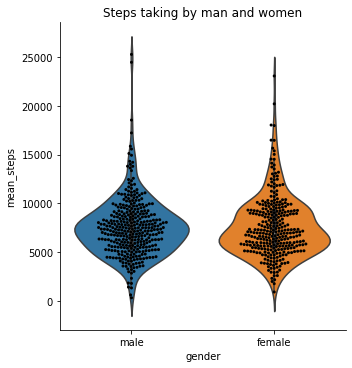

In [27]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)#swarmplot steps per gender 
sns.swarmplot(x="gender", y="mean_steps", size=3, color="k", data=df)
plt.title('Steps taking by man and women')
plt.show()

###### Here we can see that in genral the male walks a little bit more steps then the female 

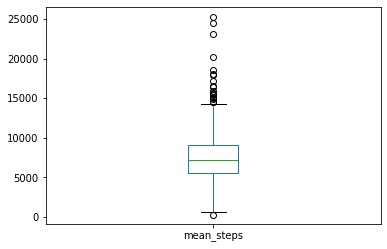

In [37]:
from scipy import stats
import matplotlib.pyplot as plt

df[['mean_steps', 'gender']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')       #don't understand how to preform a t-test 

# The relation between two qualitative variables

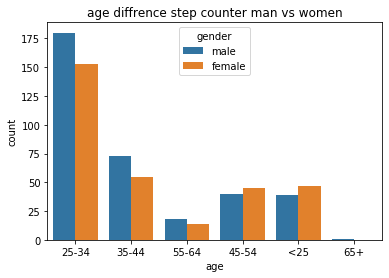

In [48]:
sns.countplot(x="age", hue="gender", data=df)      #plot that shows the age and gender diffences from the paricipants    
plt.title('age diffrence step counter man vs women')
plt.show()

# Cross table with relevant percentages


In [56]:
pd.crosstab(df["age"],df["gender"], normalize="columns") #cross table with the percentages between male and female


gender,female,male
age,,
25-34,0.487261,0.512821
35-44,0.175159,0.207977
45-54,0.143312,0.113960
55-64,0.044586,0.051282
65+,0.000000,0.002849
<25,0.149682,0.111111
